In [2]:
pip install azure.cosmos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.8/225.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 15.4 MB/s eta 0:00:00


In [3]:
pip install azure.storage.blob


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.0/388.0 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.4 MB/s eta 0:00:00


In [44]:
import pandas as pd
from azure.cosmos import exceptions, CosmosClient
from azure.storage.blob import BlobServiceClient
import io
from azure.cosmos.partition_key import PartitionKey

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
import uuid
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TIP /BigBasket Products.csv")
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27555 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [7]:
df.shape

(27555, 10)

In [8]:
df.rename(columns = {'index':'id'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27555 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [9]:
df['id'] = df['id'].astype(str)

In [10]:
print('category values')
df.category.value_counts()

category values


Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: category, dtype: int64

In [11]:
print('subcategory values')
df.sub_category.value_counts()

subcategory values


Skin Care                   2294
Health & Medicine           1133
Hair Care                   1028
Storage & Accessories       1015
Fragrances & Deos           1000
                            ... 
Mutton & Lamb                 20
Water                         17
Flower Bouquets, Bunches       8
Pork & Other Meats             5
Marinades                      1
Name: sub_category, Length: 90, dtype: int64

In [12]:
df.isnull().sum()


id                 0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description        0
dtype: int64

In [13]:
#Mean of ratings
print('Mean Value')
rating_mean = df.rating.mean()
rating_mean

Mean Value


3.943409583179249

In [14]:
#Median of ratings
print('Median Value')
rating_median = df.rating.median()
rating_median

Median Value


4.1

In [15]:
#filling the rating null values by mean rating
df.rating.fillna(value=rating_mean,inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

id              0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [18]:
print(f'Number of Brands is',df["brand"].nunique())
print(f'Number of Categories is',df["category"].nunique())
print(f'Number of Sub-Categories is',df["sub_category"].nunique())
print(f'Number of Products is', df["product"].nunique())
print(f'Number of Types is', df["type"].nunique())

Number of Brands is 2313
Number of Categories is 11
Number of Sub-Categories is 90
Number of Products is 23539
Number of Types is 426


<Axes: xlabel='rating', ylabel='Count'>

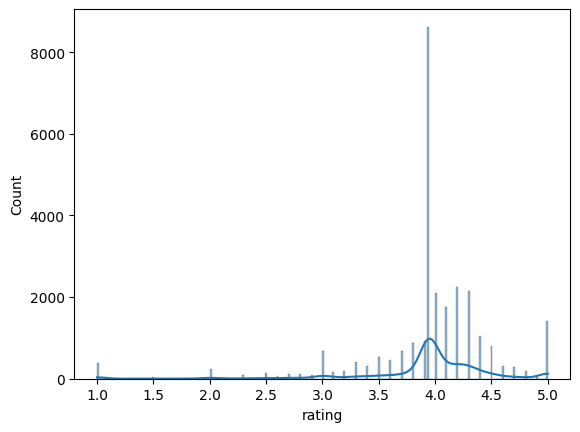

In [19]:
sns.histplot(df.rating,kde=True)

In [20]:
df["discount"] = (df["market_price"] - df["sale_price"]) / df["market_price"] * 100
df.tail()

,id,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,20.000000
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,10.000000
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...,0.000000
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",20.000000
27554,27555,United Dreams Go Far Deodorant,Beauty & Hygiene,Men's Grooming,United Colors Of Benetton,214.53,390.0,Men's Deodorants,4.5,The new mens fragrance from the United Dreams ...,44.992308


In [21]:
discount_data = df[df['discount'] == True]
discount_data

,id,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
7844,7845,Motomax Protectant Spray,Cleaning & Household,Car & Shoe Care,Pidilite,99.00,100.0,Car Polish & Cleaners,4.0,Motomax range products specially formulated fo...,1.0
11430,11431,Rice Flour/Akki Hittu - Pesticide Free,"Foodgrains, Oil & Masala","Atta, Flours & Sooji",Safe Harvest,74.25,75.0,Rice & Other Flours,4.1,Safe Harvest Sona Mansoori Raw Rice is procure...,1.0
13904,13905,Puttu Podi - Chemba,"Foodgrains, Oil & Masala","Atta, Flours & Sooji",Double Horse,74.25,75.0,Rice & Other Flours,4.3,Wheat Puttu Podi a Vegetarian Promise. Click ...,1.0
14893,14894,"Punjabi Mix Dal, Moong dal + Red Masoor Whole,...","Foodgrains, Oil & Masala",Dals & Pulses,bb Royal,99.00,100.0,Urad & Other Dals,4.1,Punjabi Mix Dal is a mixture of Arhar(Toor) Da...,1.0
23654,23655,Vadi Matta,"Foodgrains, Oil & Masala",Rice & Rice Products,Double Horse,321.75,325.0,Boiled & Steam Rice,4.1,Imagine a dish filled with pristine long grain...,1.0
26238,26239,Green 100% Natural Made From Stevia,"Foodgrains, Oil & Masala","Salt, Sugar & Jaggery",Sugar free,74.25,75.0,Sugarfree Sweeteners,4.2,SugarFree Green is made from 100% Natural sour...,1.0


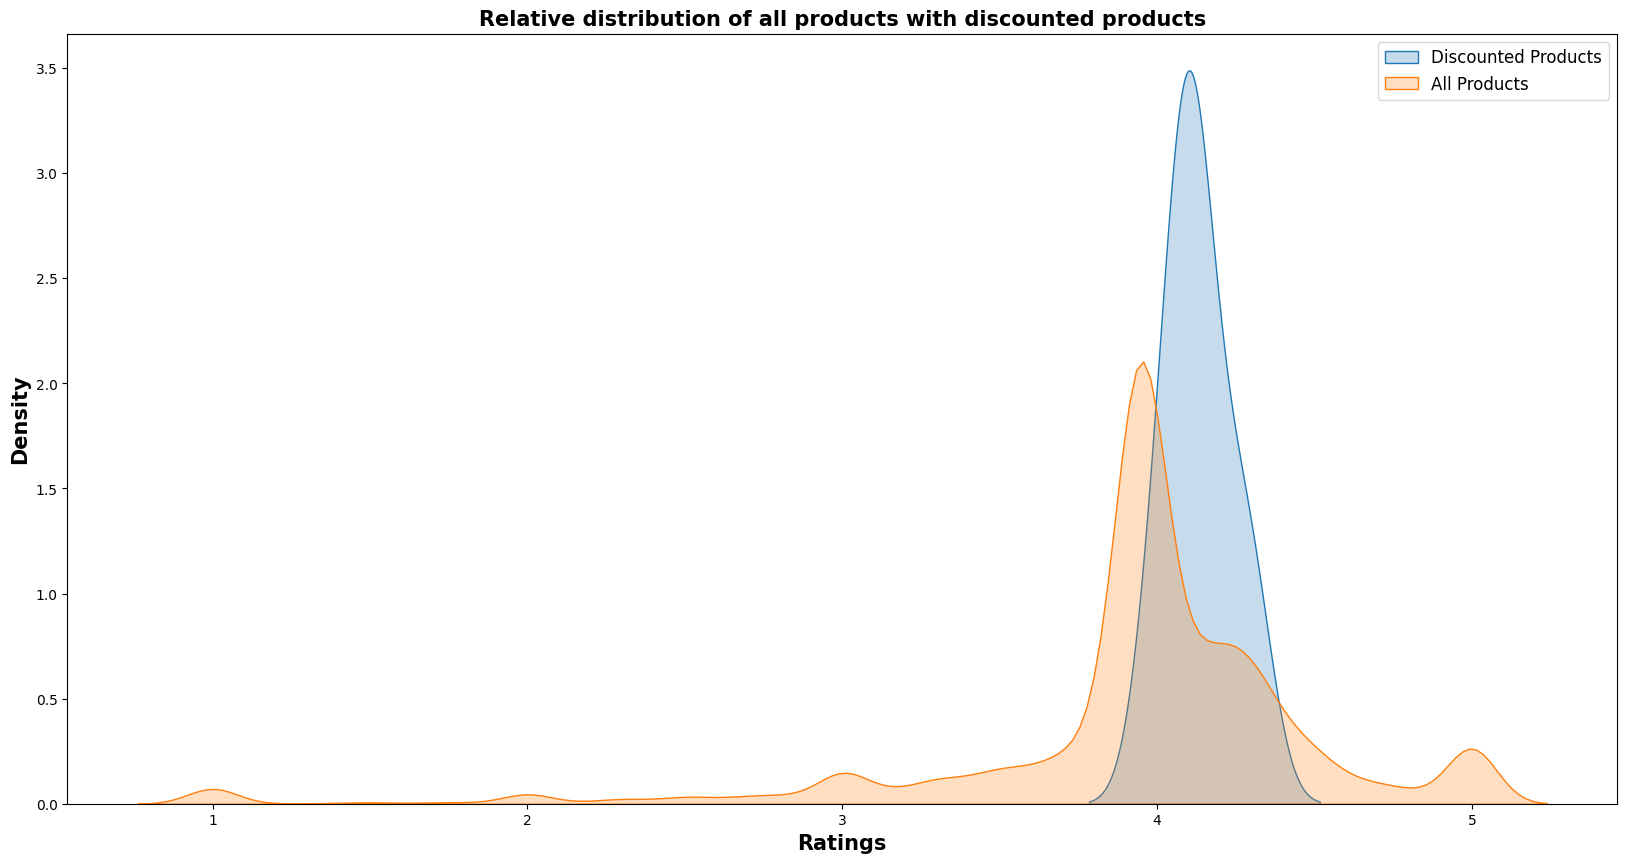

In [22]:
fig = plt.figure(figsize=(20,10))

sns.kdeplot(discount_data['rating'], shade=True, label='Discounted Products')
sns.kdeplot(df['rating'], shade=True, label='All Products')

plt.xlabel("Ratings", fontsize=15, weight='semibold')
plt.ylabel("Density", fontsize=15, weight='semibold')
plt.title("Relative distribution of all products with discounted products", fontsize=15, weight='semibold')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, fontsize=12)

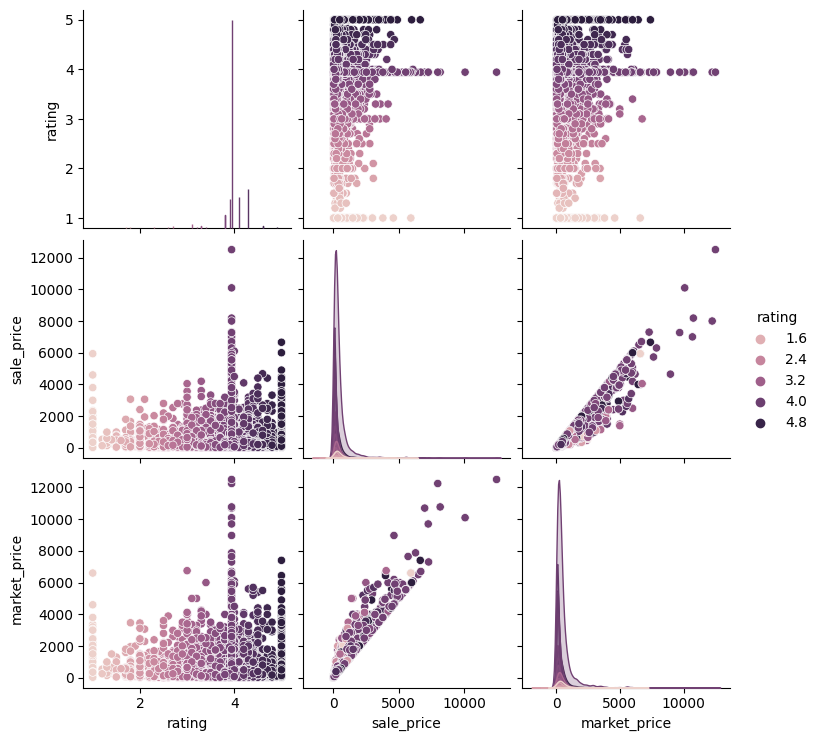

In [23]:
sns.pairplot(df,vars=['rating','sale_price','market_price'],hue='rating')

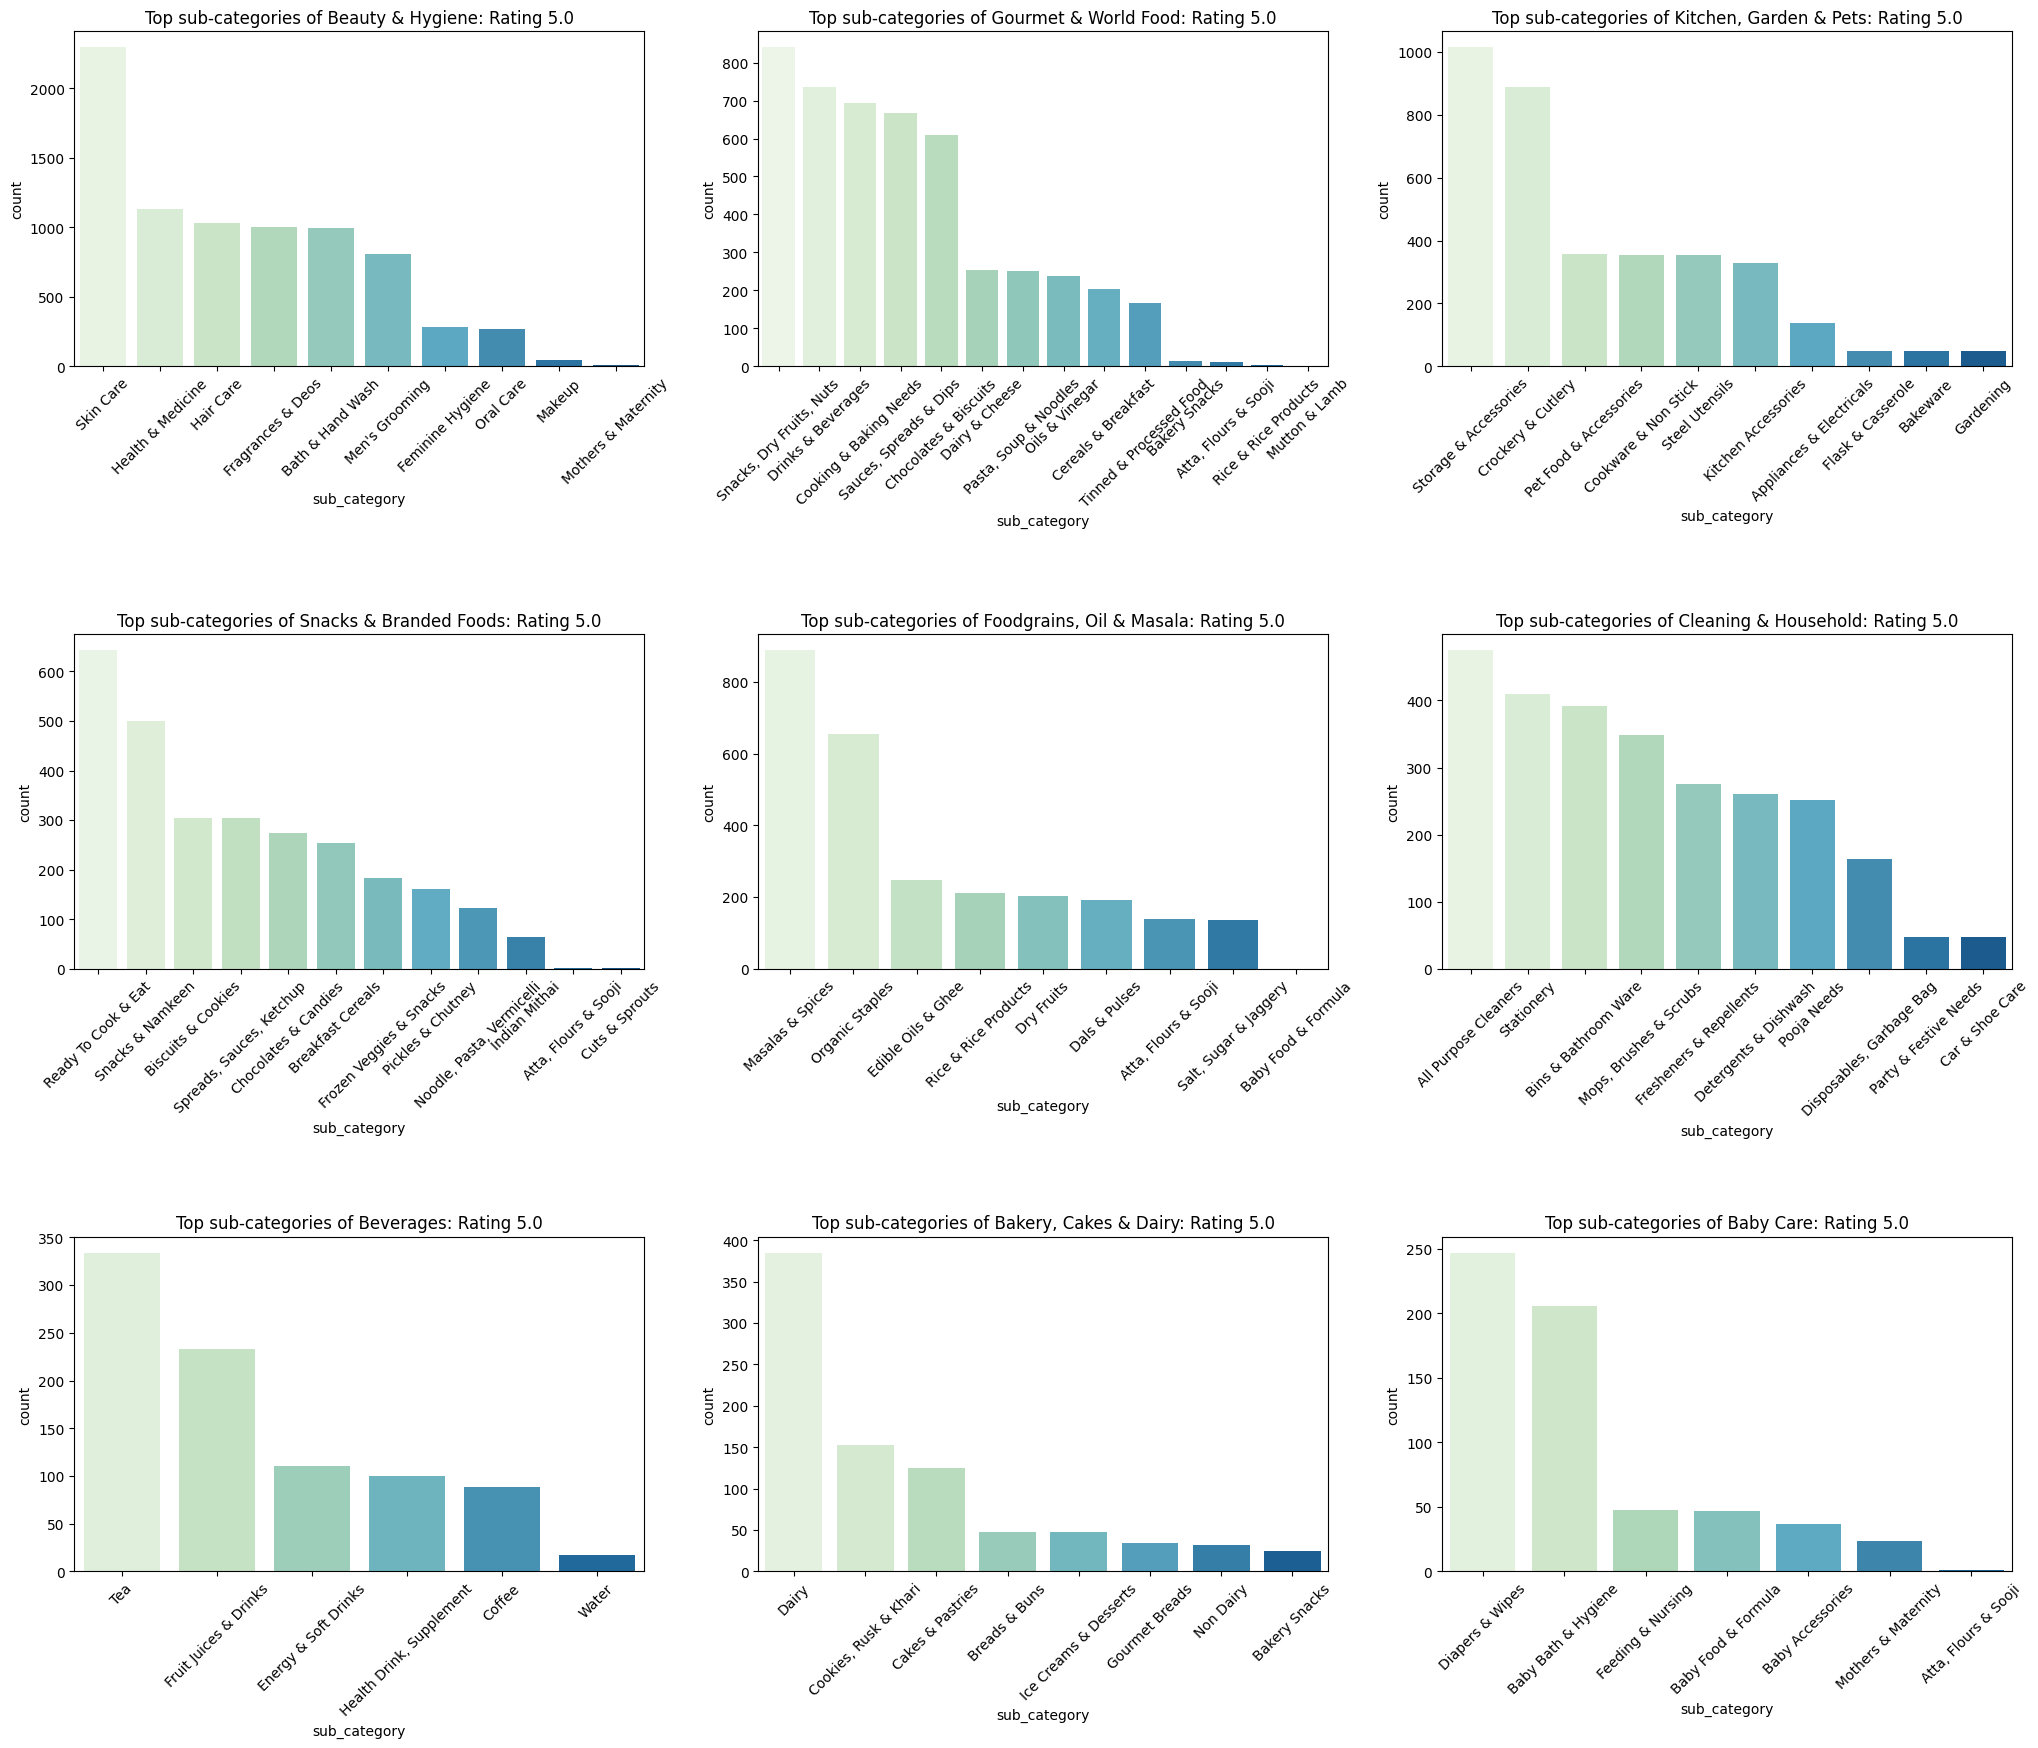

In [24]:
# printing top subcategories with 5.0 rating for each category
category_list = df['category'].value_counts().index.tolist()
fig, axes = plt.subplots(3, 3, figsize=(25,20))
for i in range(9):
    order = df['sub_category'].loc[df['category'] == category_list[i]].value_counts().index
    sns.countplot(ax=axes[i//3][i%3], x='sub_category', data=df.loc[df['category'] == category_list[i]], palette='GnBu', order=order)
    fig.subplots_adjust(hspace=.8)
    axes[i//3][i%3].set_title(f'Top sub-categories of {category_list[i]}: Rating 5.0')
    axes[i//3][i%3].set_xticklabels(order.tolist(), rotation = 45)

In [41]:
blob_connection_string = 'DefaultEndpointsProtocol=https;AccountName=inven;AccountKey=uxM4LqtpG4MZ+aUCeolmGsiWXgW2bD71Y1CeYW5a/HZkc+2rF2zotVq0xCYRTIxFkz5eH32/TxEv+ASt1GU15w==;EndpointSuffix=core.windows.net'
blob_service_client = BlobServiceClient.from_connection_string(blob_connection_string)
container_client = blob_service_client.get_container_client('inventory')

In [42]:
container_client.create_container()
blob_client = container_client.get_blob_client('inventory_data.csv')
blob_client.upload_blob(data=df.to_csv(index=False), overwrite=True)

{'etag': '"0x8DB80D8E0F6D30D"',
 'last_modified': datetime.datetime(2023, 7, 10, 0, 1, 57, tzinfo=datetime.timezone.utc),
 'content_md5': bytearray(b'Q\xae\xd5>,\xfbqW\xe3\xef,)\x88aP"'),
 'client_request_id': 'fc214962-1eb4-11ee-be3f-0242ac1c000c',
 'request_id': 'b69a0620-401e-005a-30c1-b280b6000000',
 'version': '2022-11-02',
 'version_id': None,
 'date': datetime.datetime(2023, 7, 10, 0, 1, 57, tzinfo=datetime.timezone.utc),
 'request_server_encrypted': True,
 'encryption_key_sha256': None,
 'encryption_scope': None}

In [45]:
blob_data = blob_client.download_blob()
blob_data_text = blob_data.content_as_text()
blob_inventory_data = pd.read_csv(io.StringIO(blob_data_text))

In [46]:
blob_inventory_data.head(5)

,id,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.000000
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",0.000000
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",52.400000
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,15.340909
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.000000


In [26]:
cosmos_endpoint = 'https://inven.documents.azure.com:443/'
cosmos_key = 'AOc9Bzg8cwg9b3XEFKjX9OWmdX6Pu2EfrosjnD50s0GWyXHkJaeZWKDaxV7vkybpL9tOs4pTqKbFACDbg7eabw=='
cosmos_client = CosmosClient(cosmos_endpoint, cosmos_key)

In [27]:
database_name = 'InventoryDB1'
container_name = 'InventoryContainer'
database = cosmos_client.create_database_if_not_exists(database_name)
container = database.create_container_if_not_exists(
    id=container_name,
    partition_key='/product',
    offer_throughput=400
)

In [28]:
df.head(1).to_dict

<bound method DataFrame.to_dict of   id                                 product          category sub_category  \
0  1  Garlic Oil - Vegetarian Capsule 500 mg  Beauty & Hygiene    Hair Care   

               brand  sale_price  market_price              type  rating  \
0  Sri Sri Ayurveda        220.0         220.0  Hair Oil & Serum     4.1   

                                         description  discount  
0  This Product contains Garlic Oil that is known...       0.0  >

In [ ]:
for _, row in df.iterrows():
    # item['id'] = str(uuid.uuid4())
    container.create_item(row.to_dict())

In [47]:
query = "SELECT * FROM c WHERE c.rating >= 4.0"
cosmos_results = list(container.query_items(query, enable_cross_partition_query=True))

In [49]:
cosmos_results

[{'id': '1',
  'product': 'Garlic Oil - Vegetarian Capsule 500 mg',
  'category': 'Beauty & Hygiene',
  'sub_category': 'Hair Care',
  'brand': 'Sri Sri Ayurveda ',
  'sale_price': 220.0,
  'market_price': 220.0,
  'type': 'Hair Oil & Serum',
  'rating': 4.1,
  'description': 'This Product contains Garlic Oil that is known to help proper digestion, maintain proper cholesterol levels, support cardiovascular and also build immunity.  For Beauty tips, tricks & more visit https://bigbasket.blog/',
  '_rid': 'NnlzALHBkU0BAAAAAAAAAA==',
  '_self': 'dbs/NnlzAA==/colls/NnlzALHBkU0=/docs/NnlzALHBkU0BAAAAAAAAAA==/',
  '_etag': '"dc000a1b-0000-0700-0000-64a9c3160000"',
  '_attachments': 'attachments/',
  '_ts': 1688847126},
 {'id': '5',
  'product': 'Creme Soft Soap - For Hands & Body',
  'category': 'Beauty & Hygiene',
  'sub_category': 'Bath & Hand Wash',
  'brand': 'Nivea',
  'sale_price': 162.0,
  'market_price': 162.0,
  'type': 'Bathing Bars & Soaps',
  'rating': 4.4,
  'description': 'Nive

In [58]:
search_keyword = input('Enter your text : ')
filtered_blob_df = df[df['product'].str.contains(search_keyword, case=False)]

database = cosmos_client.get_database_client(database_name)
container = database.get_container_client(container_name)
query = f"SELECT * FROM c WHERE CONTAINS(c.product, '{search_keyword}')"
filtered_cosmos_results = list(container.query_items(query, enable_cross_partition_query=True))
filtered_cosmos_results

Enter your text : skin


[{'id': '4307',
  'product': 'Gold Glowing skin Face Scrub',
  'category': 'Beauty & Hygiene',
  'sub_category': 'Skin Care',
  'brand': 'Natures Essence',
  'sale_price': 200.0,
  'market_price': 200.0,
  'type': 'Face Care',
  'rating': 2.5,
  'description': 'Facial scrub uses small particles, micro beads to get rid of the dead skin cells\r\nand make way for new ones and reveals a Radiant Complexion \r\nGlow boosting gold sparkle leaves skin instantly bright\r\nand radiant.\r\nAntibacterial Honey deep cleanses pores.\r\nAloe vera makes skin supple.',
  '_rid': 'NnlzALHBkU3TEAAAAAAAAA==',
  '_self': 'dbs/NnlzAA==/colls/NnlzALHBkU0=/docs/NnlzALHBkU3TEAAAAAAAAA==/',
  '_etag': '"dc004f2c-0000-0700-0000-64a9c37d0000"',
  '_attachments': 'attachments/',
  '_ts': 1688847229},
 {'id': '6033',
  'product': 'Silkskin Indian Ginseng-Aloevera Moisturising Cream',
  'category': 'Beauty & Hygiene',
  'sub_category': 'Skin Care',
  'brand': 'Just Herbs',
  'sale_price': 745.0,
  'market_price': 74

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the 'description' column
tfidf_matrix = vectorizer.fit_transform(df['description'].values.astype('U'))

def recommend_product(input_text):
    # Transform the input text using the vectorizer
    input_vector = vectorizer.transform([input_text])

    # Calculate the cosine similarity between input and dataset
    similarities = cosine_similarity(input_vector, tfidf_matrix)

    # Get the index of the most similar product
    most_similar_index = similarities.argmax()

    # Return the details of the most similar product
    most_similar_product = df.iloc[most_similar_index]
    return most_similar_product

# Test the function
user_input = input("Enter your text: ")
recommended_product = recommend_product(user_input)
print("Recommended Product:")
print("Name:", recommended_product['product'])
print("Brand:", recommended_product['brand'])
print("Category:", recommended_product['category'])

Enter your text: oil
Recommended Product:
Name: Onion Black Seed Hair Oil
Brand: Greenberry Organics
Category: Beauty & Hygiene


In [30]:
def recommend_products(input_text, num_recommendations=5):
    # Transform the input text using the vectorizer
    input_vector = vectorizer.transform([input_text])

    # Calculate the cosine similarity between input and dataset
    similarities = cosine_similarity(input_vector, tfidf_matrix)

    # Get the indices of the top N most similar products
    #The argsort function is used to get the indices of the top num_recommendations most similar products.
    top_indices = similarities.argsort()[0][-num_recommendations:][::-1]

    # Return the details of the top N most similar products
    top_products = df.iloc[top_indices]
    return top_products

# Test the function
user_input = input("Enter your text: ")
recommended_products = recommend_products(user_input)
print("Recommended Products:")
for index, product in recommended_products.iterrows():
    print("Name:", product['product'])
    print("Brand:", product['brand'])
    print("Category:", product['category'])
    print("-----------------------------")

Enter your text: oil
Recommended Products:
Name: Onion Black Seed Hair Oil
Brand: Greenberry Organics
Category: Beauty & Hygiene
-----------------------------
Name: Destress Body Massage Oil
Brand: INATUR 
Category: Beauty & Hygiene
-----------------------------
Name: Earth C7 Argan Oil
Brand: ColorBar
Category: Beauty & Hygiene
-----------------------------
Name: 7 Oils In One Non Sticky Hair Oil
Brand: Emami
Category: Beauty & Hygiene
-----------------------------
Name: Olive Oil - Pomace
Brand: Basso
Category: Gourmet & World Food
-----------------------------


In [30]:
from sklearn.linear_model import LinearRegression
X = df[['rating']]  # Feature: rating
y = df['sale_price']  # Target variable: saleprice

In [31]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [32]:
results_df = pd.DataFrame({
    'Rating': X['rating'],
    'Actual Sale Price': y,
    'Predicted Sale Price': model.predict(X)
})

In [33]:
print("Demand Forecasting Results:")
print(results_df)

Demand Forecasting Results:
       Rating  Actual Sale Price  Predicted Sale Price
0         4.1             220.00            316.409434
1         2.3             180.00            386.751057
2         3.4             119.00            343.764510
3         3.7             149.00            332.040906
4         4.4             162.00            304.685831
...       ...                ...                   ...
27550     3.9             199.20            324.225170
27551     4.0              67.50            320.317302
27552     3.8             200.00            328.133038
27553     4.2             396.00            312.501566
27554     4.5             214.53            300.777963

[27553 rows x 3 columns]


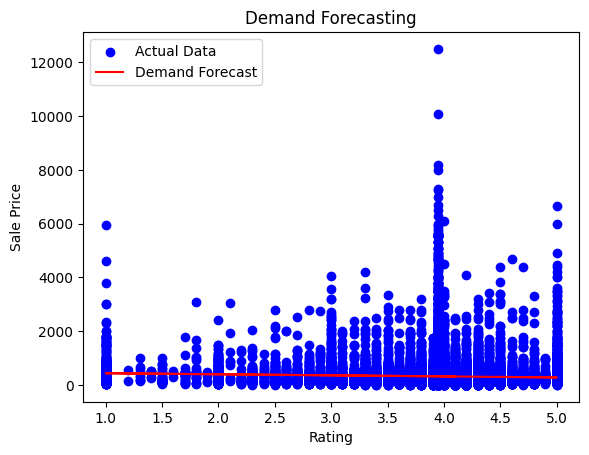

In [34]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Demand Forecast')
plt.xlabel('Rating')
plt.ylabel('Sale Price')
plt.title('Demand Forecasting')
plt.legend()
plt.show()